In [1]:
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
import time
from sklearn import metrics
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
import xgboost

# Uploding the Data

In [2]:
#Training set
validation_Spont1 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Training/Evyatar Cohen/Evyatar636771052727603804Spontan.csv')
validation_Sync1 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Training/Evyatar Cohen/Evyatar636771053639929594Sync.csv')
validation_Alone1 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Training/Evyatar Cohen/Evyatar636771054555711409Alone.csv')

Spont2 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Training/Nofar Social_Nuero/Nofar636759795182793299Spontan.csv')
Sync2 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Training/Nofar Social_Nuero/Nofar636759797397919664Sync.csv')
Alone2 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Training/Nofar Social_Nuero/Nofar636759796290435160Alone.csv')

Spont3 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Training/Oriya Social_Nuero/Oriya636759804404113837Spontan.csv')
Sync3 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Training/Oriya Social_Nuero/Oriya636759806131350399Sync.csv')
Alone3 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Training/Oriya Social_Nuero/Oriya636759805268396661Alone.csv')

Alone4 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Training/Orya Kalmanovitz/OryaB636771082736601528Alone.csv')
Spont4 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Training/Orya Kalmanovitz/OryaB636771083605535985Spontan.csv')
Sync4 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Training/Orya Kalmanovitz/OryaB636771084494502229Sync.csv')

Alone5 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Training/Revital Marbel/Revital636770955999435879Alone.csv')
Spont5 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Training/Revital Marbel/Revital636770957038873193Spontan.csv')
Sync5 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Training/Revital Marbel/Revital636770957894370062Sync.csv')

Spont6 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Training/Shahar Terner/Sachar636771045591258071Spontan.csv')
Sync6 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Training/Shahar Terner/Sachar636771046527112972Sync.csv')
Alone6 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Training/Shahar Terner/Sachar636771047408504303Alone.csv')

Spont7 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Training/Shelly Social_Nuero/Shelly636759787508979097Spontan.csv')
Sync7 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Training/Shelly Social_Nuero/Shelly636759789526313406Sync.csv')
Alone7 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Training/Shelly Social_Nuero/Shelly636759788383205274Alone.csv')

Spont8 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Training/Yael Hagai/Yael636771059544754823Spontan.csv')
Sync8 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Training/Yael Hagai/Yael636771060699529085Sync.csv')
Alone8 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Training/Yael Hagai/Yael636771061659067649Alone.csv')

Spont9 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Training/Yoel Raz/Yoel636760921663075813Spontan.csv')
Sync9 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Training/Yoel Raz/Yoel636760923490742912Sync.csv')
Alone9 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Training/Yoel Raz/Yoel636760922573364655Alone.csv')
#27 dataframes

handRight = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/HandRight.csv')

#Final Test Set
TestSpont1 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Validation/Itiel Lab/Itiel636770940701219076Spontan.csv')
TestSync1 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Validation/Itiel Lab/Itiel636770941638547912Sync.csv')
TestAlone1 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Validation/Itiel Lab/Itiel636770942529041679Alone.csv')

TestSpont2 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Validation/Mor SHerman/Mor636771064635567065Spontan.csv')
TestSync2 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Validation/Mor SHerman/Mor636771065531910215Sync.csv')
TestAlone2 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Validation/Mor SHerman/Mor636771066407626524Alone.csv')

TestSpont3 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Validation/Oded Medina/Oded636754670490266956Spontan.csv')
TestSync3 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Validation/Oded Medina/Oded636754671560850581Sync.csv')
TestAlone3 = pd.read_csv('C:/Users/Dikla/Desktop/Hand Positioning/Validation/Oded Medina/Oded636754669540564461Alone.csv')

## First, we want to convert all the subjects to lists and at least to DataFrames and we'll want to save one of the subjects for last validation.

In [3]:
list_spont = [Spont2,Spont3,Spont4,Spont5,Spont6,Spont7,Spont8,Spont9]
list_sync = [Sync2,Sync3,Sync4,Sync5,Sync6,Sync7,Sync8,Sync9]
list_alone = [Alone2,Alone3,Alone4,Alone5,Alone6,Alone7,Alone8,Alone9]

list_test_spont = [TestSpont1,TestSpont2,TestSpont3]
list_test_sync = [TestSync1,TestSync2,TestSync3]
list_test_alone = [TestAlone1,TestAlone2,TestAlone3]

## Reset 'Time' column to start from 0 seconds for each dataframe so it will be easier for work.

In [4]:
for i in range (len(list_spont)):
    list_spont[i]['Time'] = list_spont[i]['Time'] - list_spont[i]['Time'].loc[0]
for i in range (len(list_sync)):
    list_sync[i]['Time'] = list_sync[i]['Time'] - list_sync[i]['Time'].loc[0] 
for i in range (len(list_alone)):
    list_alone[i]['Time'] = list_alone[i]['Time'] - list_alone[i]['Time'].loc[0]
    
    
validation_Spont1['Time'] = validation_Spont1['Time'] - validation_Spont1['Time'].loc[0]
validation_Sync1['Time'] = validation_Sync1['Time'] - validation_Sync1['Time'].loc[0]
validation_Alone1['Time'] = validation_Alone1['Time'] - validation_Alone1['Time'].loc[0]
    
    
for i in range (len(list_test_spont)):
    list_test_spont[i]['Time'] = list_test_spont[i]['Time'] - list_test_spont[i]['Time'].loc[0]
for i in range (len(list_test_sync)):
    list_test_sync[i]['Time'] = list_test_sync[i]['Time'] - list_test_sync[i]['Time'].loc[0]
for i in range (len(list_test_alone)):
    list_test_alone[i]['Time'] = list_test_alone[i]['Time'] - list_test_alone[i]['Time'].loc[0]
    
handRight['Time'] = handRight['Time'] - handRight['Time'].loc[0]

## Converting to DataFrames all lists

In [5]:
#converting to DF
df_spont_train = pd.concat(list_spont,ignore_index = True)
df_sync_train = pd.concat(list_sync,ignore_index = True)
df_alone_train = pd.concat(list_alone,ignore_index = True)

df_spont_val = validation_Spont1
df_sync_val = validation_Sync1
df_alone_val = validation_Alone1

df_list_test_spont = pd.concat(list_test_spont,ignore_index = True)
df_list_test_sync = pd.concat(list_test_sync,ignore_index = True)
df_list_test_alone = pd.concat(list_test_alone,ignore_index = True)

## show one of the DF for example

In [6]:
df_spont_train

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,0.0000,45421,right,2,84.46407,205.2425,129.25620,10.362360,14.27013,-175.900300,...,-0.811867,139.4453,176.9281,165.18970,371.1763,118.90700,249.19900,0.0,0.105978,0.0
1,0.0000,45421,left,2,-101.47470,201.6224,45.53434,110.036900,-158.14970,-336.006600,...,1.869434,-165.9261,201.3730,17.71334,-354.8739,48.94086,-54.30361,0.0,0.408430,0.0
2,0.0166,45423,right,2,84.53292,205.0706,125.73420,11.283680,13.80425,-199.939800,...,-0.798033,139.1613,176.8005,162.22480,372.0204,121.27320,244.85750,0.0,0.081881,0.0
3,0.0166,45423,left,2,-100.64600,200.7659,40.11415,59.850410,-96.17702,-315.820300,...,1.850330,-165.4394,202.0032,13.41595,-351.5085,46.76607,-60.16769,0.0,0.440008,0.0
4,0.0336,45425,right,2,84.75890,205.5481,122.01730,9.366974,22.98078,-220.643100,...,-0.782294,138.8203,176.8812,159.02130,372.5789,123.41730,240.55030,0.0,0.068991,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67062,74.8718,52512,left,2,-81.66566,203.9826,24.04028,240.809500,-160.56200,-222.444200,...,0.845894,-121.2401,146.1889,44.91408,-263.3239,-65.38571,89.68940,0.0,1.299514,0.0
67063,74.9057,52516,right,2,158.51870,172.6876,-29.32913,62.951450,93.99306,-63.022420,...,-0.452287,200.4651,148.9561,25.42753,400.5782,31.01108,139.27960,0.0,0.448368,0.0
67064,74.9057,52516,left,2,-77.57621,198.9182,20.57973,127.002900,-218.65710,-80.403090,...,0.827028,-120.1531,144.5244,44.43902,-276.8819,-56.07000,90.44517,0.0,0.542512,0.0
67065,74.9384,52519,right,2,159.35720,175.7603,-30.16282,10.300270,118.67660,-7.947631,...,-0.432002,199.5587,149.5821,24.80171,390.8217,24.22654,145.63370,0.0,0.513919,0.0


### We need to save all the frames after 7 seconds (remove all the seconds before) because they can be wrong and "confuse" us

In [7]:
#save all frames after 7 seconds (remove before)
df_spont_train = df_spont_train[df_spont_train['Time'] > 7]
df_sync_train = df_sync_train[df_sync_train['Time'] > 7]
df_alone_train = df_alone_train[df_alone_train['Time'] > 7]

df_spont_val = df_spont_val[df_spont_val['Time'] > 7]
df_sync_val = df_sync_val[df_sync_val['Time'] > 7]
df_alone_val = df_alone_val[df_alone_val['Time'] > 7]

df_list_test_spont = df_list_test_spont[df_list_test_spont['Time'] > 7]
df_list_test_sync = df_list_test_sync[df_list_test_sync['Time'] > 7]
df_list_test_alone = df_list_test_alone[df_list_test_alone['Time'] > 7]

handRight = handRight[handRight['Time'] > 7]

## One DF for show

In [8]:
df_spont_train

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
846,7.0078,46229,right,2,178.00680,284.5815,117.99350,-108.98820,-110.82870,114.207600,...,-1.802395,211.4219,223.0905,107.200900,330.6671,1.888543,116.08020,0.327460,1.300922,0.117076
847,7.0078,46229,left,2,-156.16490,316.4496,34.64326,-28.93483,-31.63134,255.832500,...,2.266312,-200.6938,283.2395,-8.000342,-364.8326,98.940380,-56.17548,0.000000,0.636534,0.000000
848,7.0243,46231,right,2,175.74170,281.9110,119.63510,-142.06860,-153.53760,96.672650,...,-1.846976,209.5302,220.9133,107.424300,326.2845,-1.735494,112.37270,0.394416,1.389177,0.121648
849,7.0243,46231,left,2,-156.25850,314.6782,38.59644,-11.11325,-99.00046,230.571800,...,2.280412,-201.2155,284.0092,-5.443998,-368.3081,104.156000,-59.86306,0.000000,0.692922,0.000000
850,7.0408,46233,right,2,173.96220,280.1721,121.54670,-78.12815,-72.85332,134.257100,...,-1.892635,208.0027,219.6315,107.965200,324.9244,-2.964451,110.95290,0.469837,1.470740,0.114929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67062,74.8718,52512,left,2,-81.66566,203.9826,24.04028,240.80950,-160.56200,-222.444200,...,0.845894,-121.2401,146.1889,44.914080,-263.3239,-65.385710,89.68940,0.000000,1.299514,0.000000
67063,74.9057,52516,right,2,158.51870,172.6876,-29.32913,62.95145,93.99306,-63.022420,...,-0.452287,200.4651,148.9561,25.427530,400.5782,31.011080,139.27960,0.000000,0.448368,0.000000
67064,74.9057,52516,left,2,-77.57621,198.9182,20.57973,127.00290,-218.65710,-80.403090,...,0.827028,-120.1531,144.5244,44.439020,-276.8819,-56.070000,90.44517,0.000000,0.542512,0.000000
67065,74.9384,52519,right,2,159.35720,175.7603,-30.16282,10.30027,118.67660,-7.947631,...,-0.432002,199.5587,149.5821,24.801710,390.8217,24.226540,145.63370,0.000000,0.513919,0.000000


## Checking NaN in all DF separated
### We'll see there is only NaN vealus in the "handRight" DF.

In [9]:
print(df_spont_train.isna().sum().sum())
print(df_sync_train.isna().sum().sum())
print(df_alone_train.isna().sum().sum())
print(df_spont_val.isna().sum().sum())
print(df_sync_val.isna().sum().sum())
print(df_alone_val.isna().sum().sum())
print(df_list_test_spont.isna().sum().sum())
print(df_list_test_sync.isna().sum().sum())
print(df_list_test_alone.isna().sum().sum())
print(handRight.isna().sum().sum())

0
0
0
0
0
0
0
0
0
2304


#### Now we'll drop all NaN from the " handRight" DF. We have about 2,000 rows in this DFso we can just delet the NaN rows. Also, we'll check all 'hand type' is actually right.

In [10]:
#drop 'NaN'
handRight = handRight.dropna()
#verifying all 'handtype' is right only in 'handRight'
handRight = handRight[handRight[' Hand Type'] == 'right']

In [11]:
#before removing all right-hand from alone
df_alone_train

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
423,7.0073,58994,left,1,-25.09975,255.7507,45.23188,143.858000,-607.579700,-139.435400,...,1.740217,-88.67735,226.0782,26.63538,-305.1488,102.22980,-36.521190,0.000000,1.694959,0.221438
424,7.0238,58996,left,1,-20.86662,247.3505,43.29146,245.549700,-447.327100,-120.795700,...,1.764604,-83.18510,215.6640,23.81408,-303.0901,93.46584,-30.005300,0.000000,1.614523,0.118337
425,7.0404,58998,left,1,-18.42975,240.4453,40.66150,123.824800,-397.832700,-146.572100,...,1.762232,-80.50581,208.0244,21.72965,-302.6205,85.71638,-21.777700,0.000000,0.788198,0.010345
426,7.0570,59000,left,1,-16.36997,233.7052,38.40542,128.456800,-410.042900,-125.684200,...,1.756342,-78.55511,201.2166,20.10092,-302.9675,79.83047,-12.938220,0.000000,0.820752,0.000000
427,7.0736,59002,left,1,-14.83483,226.2856,36.03491,62.891980,-464.000000,-149.824600,...,1.748369,-77.45807,194.3602,18.38106,-304.3510,75.53379,-5.846048,0.000000,0.980538,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34291,74.8092,59984,left,1,-125.81370,214.8894,20.59324,20.170870,19.997410,37.082170,...,0.409534,-146.63140,148.2971,44.40766,-258.0887,-77.52971,112.970600,0.116068,1.901876,0.000000
34292,74.8427,59986,left,1,-125.92320,215.6769,22.09264,-6.867068,21.957800,42.485630,...,0.399021,-146.11130,148.8045,45.68930,-253.6847,-80.13625,109.996700,0.134497,1.952747,0.000000
34293,74.8767,59988,left,1,-125.62170,215.7428,23.39750,17.454730,-3.217659,31.446690,...,0.379251,-144.81740,148.4588,46.66075,-249.6531,-83.33176,105.004300,0.120680,1.984825,0.000000
34294,74.9101,59989,left,1,-125.13520,215.6353,23.80248,25.567410,-5.648659,21.284490,...,0.368866,-143.84820,148.1024,46.72861,-248.2768,-84.26936,103.468300,0.097735,1.988376,0.000000


### In the alone DF we should have only left hand. we'll check this now and delete all right hand tha will be there.

In [12]:
#keeping all left-hand only
df_alone_train = df_alone_train[df_alone_train[' Hand Type'] == 'left']
df_alone_val = df_alone_val[df_alone_val[' Hand Type'] == 'left']
df_list_test_alone = df_list_test_alone[df_list_test_alone[' Hand Type'] == 'left']

#### after removing all right-hand from alone (check number of rows)

In [13]:
df_alone_train

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
423,7.0073,58994,left,1,-25.09975,255.7507,45.23188,143.858000,-607.579700,-139.435400,...,1.740217,-88.67735,226.0782,26.63538,-305.1488,102.22980,-36.521190,0.000000,1.694959,0.221438
424,7.0238,58996,left,1,-20.86662,247.3505,43.29146,245.549700,-447.327100,-120.795700,...,1.764604,-83.18510,215.6640,23.81408,-303.0901,93.46584,-30.005300,0.000000,1.614523,0.118337
425,7.0404,58998,left,1,-18.42975,240.4453,40.66150,123.824800,-397.832700,-146.572100,...,1.762232,-80.50581,208.0244,21.72965,-302.6205,85.71638,-21.777700,0.000000,0.788198,0.010345
426,7.0570,59000,left,1,-16.36997,233.7052,38.40542,128.456800,-410.042900,-125.684200,...,1.756342,-78.55511,201.2166,20.10092,-302.9675,79.83047,-12.938220,0.000000,0.820752,0.000000
427,7.0736,59002,left,1,-14.83483,226.2856,36.03491,62.891980,-464.000000,-149.824600,...,1.748369,-77.45807,194.3602,18.38106,-304.3510,75.53379,-5.846048,0.000000,0.980538,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34291,74.8092,59984,left,1,-125.81370,214.8894,20.59324,20.170870,19.997410,37.082170,...,0.409534,-146.63140,148.2971,44.40766,-258.0887,-77.52971,112.970600,0.116068,1.901876,0.000000
34292,74.8427,59986,left,1,-125.92320,215.6769,22.09264,-6.867068,21.957800,42.485630,...,0.399021,-146.11130,148.8045,45.68930,-253.6847,-80.13625,109.996700,0.134497,1.952747,0.000000
34293,74.8767,59988,left,1,-125.62170,215.7428,23.39750,17.454730,-3.217659,31.446690,...,0.379251,-144.81740,148.4588,46.66075,-249.6531,-83.33176,105.004300,0.120680,1.984825,0.000000
34294,74.9101,59989,left,1,-125.13520,215.6353,23.80248,25.567410,-5.648659,21.284490,...,0.368866,-143.84820,148.1024,46.72861,-248.2768,-84.26936,103.468300,0.097735,1.988376,0.000000


### In the alone DF we sopose to have only 1 hand in "# hand". Lets check this.

In [14]:
#keep only 1 hand frame
df_alone_train = df_alone_train[df_alone_train[' # hands'] == 1]
df_alone_val = df_alone_val[df_alone_val[' # hands'] == 1]
df_list_test_alone = df_list_test_alone[df_list_test_alone[' # hands'] == 1]

### In the spontanios and sync DF we sopose to have 2 hands in "# hand". Lets check this.

In [15]:
#keep only 2 hand frame
df_spont_train = df_spont_train[df_spont_train[' # hands'] == 2]
df_sync_train = df_sync_train[df_sync_train[' # hands'] == 2]


df_spont_val = df_spont_val[df_spont_val[' # hands'] == 2]
df_sync_val = df_sync_val[df_sync_val[' # hands'] == 2]


df_list_test_spont = df_list_test_spont[df_list_test_spont[' # hands'] == 2]
df_list_test_sync = df_list_test_sync[df_list_test_sync[' # hands'] == 2]

In [16]:
#show after removing any ''# hands' that is not 1 (check number of rows)
df_alone_train

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
423,7.0073,58994,left,1,-25.09975,255.7507,45.23188,143.858000,-607.579700,-139.435400,...,1.740217,-88.67735,226.0782,26.63538,-305.1488,102.22980,-36.521190,0.000000,1.694959,0.221438
424,7.0238,58996,left,1,-20.86662,247.3505,43.29146,245.549700,-447.327100,-120.795700,...,1.764604,-83.18510,215.6640,23.81408,-303.0901,93.46584,-30.005300,0.000000,1.614523,0.118337
425,7.0404,58998,left,1,-18.42975,240.4453,40.66150,123.824800,-397.832700,-146.572100,...,1.762232,-80.50581,208.0244,21.72965,-302.6205,85.71638,-21.777700,0.000000,0.788198,0.010345
426,7.0570,59000,left,1,-16.36997,233.7052,38.40542,128.456800,-410.042900,-125.684200,...,1.756342,-78.55511,201.2166,20.10092,-302.9675,79.83047,-12.938220,0.000000,0.820752,0.000000
427,7.0736,59002,left,1,-14.83483,226.2856,36.03491,62.891980,-464.000000,-149.824600,...,1.748369,-77.45807,194.3602,18.38106,-304.3510,75.53379,-5.846048,0.000000,0.980538,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34291,74.8092,59984,left,1,-125.81370,214.8894,20.59324,20.170870,19.997410,37.082170,...,0.409534,-146.63140,148.2971,44.40766,-258.0887,-77.52971,112.970600,0.116068,1.901876,0.000000
34292,74.8427,59986,left,1,-125.92320,215.6769,22.09264,-6.867068,21.957800,42.485630,...,0.399021,-146.11130,148.8045,45.68930,-253.6847,-80.13625,109.996700,0.134497,1.952747,0.000000
34293,74.8767,59988,left,1,-125.62170,215.7428,23.39750,17.454730,-3.217659,31.446690,...,0.379251,-144.81740,148.4588,46.66075,-249.6531,-83.33176,105.004300,0.120680,1.984825,0.000000
34294,74.9101,59989,left,1,-125.13520,215.6353,23.80248,25.567410,-5.648659,21.284490,...,0.368866,-143.84820,148.1024,46.72861,-248.2768,-84.26936,103.468300,0.097735,1.988376,0.000000


### After all the row's delete we need to reset our indexes

In [17]:
#reset index of all DF for future merge
df_alone_train = df_alone_train.reset_index()
df_alone_train = df_alone_train.drop(['index'], axis = 1)

df_alone_val = df_alone_val.reset_index()
df_alone_val = df_alone_val.drop(['index'], axis = 1)

df_list_test_alone = df_list_test_alone.reset_index()
df_list_test_alone = df_list_test_alone.drop(['index'], axis = 1)

handRight = handRight.reset_index()
handRight = handRight.drop(['index'], axis = 1)

### Verifying all 'handtype' is left only in 'alone' DF

In [18]:
df_alone_train = df_alone_train[df_alone_train[' Hand Type'] == 'left']
df_alone_val = df_alone_val[df_alone_val[' Hand Type'] == 'left']
df_list_test_alone = df_list_test_alone[df_list_test_alone[' Hand Type'] == 'left']

### Now we want to merge between 'alone' DF and 'handRight' DF

In [19]:
#merging hand right with alone ( left only-df_alone_train)
DF_temp_handRight = handRight
while (len(DF_temp_handRight) <= len(df_alone_train)) :
    DF_temp_handRight = pd.concat([DF_temp_handRight, handRight],ignore_index = True)
remove = len(DF_temp_handRight) - len(df_alone_train)
DF_temp_handRight = DF_temp_handRight.drop(DF_temp_handRight.tail(remove).index)
DF_temp_handRight = DF_temp_handRight.reset_index()
DF_temp_handRight = DF_temp_handRight.drop(['index'], axis = 1)
df_alone_train = pd.concat([DF_temp_handRight, df_alone_train]).sort_index(kind='merge') #kind='merge' sort concat by indexes

In [20]:
#merging hand right with alone ( left only-df_alone_val)
DF_temp_handRight = handRight
while (len(DF_temp_handRight) <= len(df_alone_val)) :
    DF_temp_handRight = pd.concat([DF_temp_handRight, handRight],ignore_index = True)
remove = len(DF_temp_handRight) - len(df_alone_val)
DF_temp_handRight = DF_temp_handRight.drop(DF_temp_handRight.tail(remove).index)
DF_temp_handRight = DF_temp_handRight.reset_index()
DF_temp_handRight = DF_temp_handRight.drop(['index'], axis = 1)
df_alone_val = pd.concat([DF_temp_handRight, df_alone_val]).sort_index(kind='merge') #kind='merge' sort concat by indexes

In [21]:
#merging hand right with alone ( left only-df_list_test_alone)
DF_temp_handRight = handRight
while (len(DF_temp_handRight) <= len(df_list_test_alone)) :
    DF_temp_handRight = pd.concat([DF_temp_handRight, handRight],ignore_index = True)
remove = len(DF_temp_handRight) - len(df_list_test_alone)
DF_temp_handRight = DF_temp_handRight.drop(DF_temp_handRight.tail(remove).index)
DF_temp_handRight = DF_temp_handRight.reset_index()
DF_temp_handRight = DF_temp_handRight.drop(['index'], axis = 1)
df_list_test_alone = pd.concat([DF_temp_handRight, df_list_test_alone]).sort_index(kind='merge') #kind='merge' sort concat by indexes

## After merging we'll reset all indexes again

In [22]:
#reset index of all DF 
df_alone_train = df_alone_train.reset_index()
df_alone_train = df_alone_train.drop(['index'], axis = 1)
df_alone_val = df_alone_val.reset_index()
df_alone_val = df_alone_val.drop(['index'], axis = 1)
df_list_test_alone = df_list_test_alone.reset_index()
df_list_test_alone = df_list_test_alone.drop(['index'], axis = 1)

#reset indexes becuse all drops we did
df_spont_train = df_spont_train.reset_index()
df_spont_train = df_spont_train.drop(['index'], axis = 1)
df_spont_val = df_spont_val.reset_index()
df_spont_val = df_spont_val.drop(['index'], axis = 1)
df_list_test_spont = df_list_test_spont.reset_index()
df_list_test_spont = df_list_test_spont.drop(['index'], axis = 1)

#reset indexes becuse all drops we did
df_sync_train = df_sync_train.reset_index()
df_sync_train = df_sync_train.drop(['index'], axis = 1)
df_sync_val = df_sync_val.reset_index()
df_sync_val = df_sync_val.drop(['index'], axis = 1)
df_list_test_sync = df_list_test_sync.reset_index()
df_list_test_sync = df_list_test_sync.drop(['index'], axis = 1)

## We want to make one frame of 'left' and 'right' hand in one single row. First we'll make a new DataFrame with all features. Then we'll merge them together and delete unnecessery columns as 'Time' for example which will be apear twice.

In [23]:
#making new DF
list1 = df_alone_train.columns
list2 = [list1[0]+'1']

In [24]:
for i in range (1, len(list1)) :
    list2.append(list1[i]+'1')

In [25]:
list3 = [list1[0]]
for i in range (1, len(list1)) :
    list3.append(list1[i])
for i in range (len(list2)) :
    list3.append(list2[i])

In [26]:
list3

['Time',
 ' Frame ID',
 ' Hand Type',
 ' # hands',
 ' Position X',
 ' Position Y',
 ' Position Z',
 ' Velocity X',
 ' Velocity Y',
 ' Velocity Z',
 ' Pitch',
 ' Roll',
 ' Yaw',
 ' Wrist Pos X',
 ' Wrist Pos Y',
 ' Wrist Pos Z',
 ' Elbow pos X',
 ' Elbow Pos Y',
 ' Elbow Pos Z',
 ' Grab Strenth',
 ' Grab Angle',
 ' Pinch Strength',
 'Time1',
 ' Frame ID1',
 ' Hand Type1',
 ' # hands1',
 ' Position X1',
 ' Position Y1',
 ' Position Z1',
 ' Velocity X1',
 ' Velocity Y1',
 ' Velocity Z1',
 ' Pitch1',
 ' Roll1',
 ' Yaw1',
 ' Wrist Pos X1',
 ' Wrist Pos Y1',
 ' Wrist Pos Z1',
 ' Elbow pos X1',
 ' Elbow Pos Y1',
 ' Elbow Pos Z1',
 ' Grab Strenth1',
 ' Grab Angle1',
 ' Pinch Strength1']

### We created new DF with all the necessery columns first

In [27]:
df_alone_train_combine = pd.DataFrame(columns = list3)
df_alone_train_combine

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw1,Wrist Pos X1,Wrist Pos Y1,Wrist Pos Z1,Elbow pos X1,Elbow Pos Y1,Elbow Pos Z1,Grab Strenth1,Grab Angle1,Pinch Strength1


### This function merges between every 2 rows with the same frame number. We want to move the second "right hand" row to be in the same row as "left hand" by putting the second row  in the rihgt side of the first row. Then we'll have a new row combines left and right hand of the same frame. ( this is the reason we needed to create a new DF, so we can duplicant the columns number for this merging.

In [28]:
def combine(df) :
    df_combine = pd.DataFrame(columns = list3)
    j = 0
    for i in range (0, len(df), 2) :
        if(df[' Hand Type'][i] == 'left'):
            left = i
            right = i+1
        else :
            right = i
            left = i+1
        list_1 = df.loc[left]
        list_2 = df.loc[right]
        list_3  = list_1.append(list_2)
        list_3 = list(list_3.values)
        df_combine.loc[j] = list_3
        j += 1
    return df_combine

In [29]:
df_alone_train_combine = combine(df_alone_train)
df_alone_val_combine = combine(df_alone_val)
df_list_test_alone_combine = combine(df_list_test_alone)

df_spont_train_combine = combine(df_spont_train)
df_spont_val_combine = combine(df_spont_val)
df_list_test_spont_combine = combine(df_list_test_spont)

df_sync_train_combine = combine(df_sync_train)
df_sync_val_combine = combine(df_sync_val)
df_list_test_sync_combine = combine(df_list_test_sync)

# Labeling 
### we want to set lables from 0-2 before merging to one DF

In [30]:
df_alone_train_combine['label'] = 0
df_alone_val_combine['label'] = 0
df_list_test_alone_combine['label'] =0

df_spont_train_combine['label'] = 1
df_spont_val_combine['label'] = 1
df_list_test_spont_combine['label'] = 1

df_sync_train_combine['label'] = 2
df_sync_val_combine['label'] = 2
df_list_test_sync_combine['label'] = 2

## Merge all 'train' to 1 DF, all 'val' DF and all 'test' DF as well

In [31]:
total_train = pd.concat([df_alone_train_combine, df_spont_train_combine, df_sync_train_combine],ignore_index = True)
total_val = pd.concat([df_alone_val_combine, df_spont_val_combine, df_sync_val_combine],ignore_index = True)
total_test = pd.concat([df_list_test_alone_combine, df_list_test_spont_combine, df_list_test_sync_combine],ignore_index = True)

## After merge we want to reset indexes again

In [32]:
#reset index of all DF 
total_train = total_train.reset_index()
total_train = total_train.drop(['index'], axis = 1)
total_val = total_val.reset_index()
total_val = total_val.drop(['index'], axis = 1)
total_test = total_test.reset_index()
total_test = total_test.drop(['index'], axis = 1)

## Drop all duplicates columns we do not need anymore, and columns as 'hand type' which has no use

In [33]:
total_train.drop('Time1', inplace=True, axis=1)
total_train.drop(' Hand Type1', inplace=True, axis=1)
total_train.drop(' # hands1', inplace=True, axis=1)
total_train.drop(' Frame ID', inplace=True, axis=1)
total_train.drop(' # hands', inplace=True, axis=1)
total_train.drop(' Hand Type', inplace=True, axis=1)

total_val.drop('Time1', inplace=True, axis=1)
total_val.drop(' Hand Type1', inplace=True, axis=1)
total_val.drop(' # hands1', inplace=True, axis=1)
total_val.drop(' Frame ID', inplace=True, axis=1)
total_val.drop(' # hands', inplace=True, axis=1)
total_val.drop(' Hand Type', inplace=True, axis=1)

total_test.drop('Time1', inplace=True, axis=1)
total_test.drop(' Hand Type1', inplace=True, axis=1)
total_test.drop(' # hands1', inplace=True, axis=1)
total_test.drop(' Frame ID', inplace=True, axis=1)
total_test.drop(' # hands', inplace=True, axis=1)
total_test.drop(' Hand Type', inplace=True, axis=1)

# Drop duplicates in total DF

In [34]:
total_train = total_train.drop_duplicates()
total_val = total_val.drop_duplicates()
total_test = total_test.drop_duplicates()

# check last time for NaN

In [35]:
print(total_train.isna().sum().sum())
print(total_val.isna().sum().sum())
print(total_test.isna().sum().sum())

0
0
0


# Spliting the Data 
### Because we already have our data splited to 3 DF, we'll drop the labels of all 3

In [36]:
X_train = total_train.drop(['label'],axis = 1)
y_train = total_train.label

X_test_final = total_test.drop(['label'],axis = 1)
y_test_final = total_test.label

X_val = total_test.drop(['label'],axis = 1)
y_val = total_test.label

# Scaling
### We need to normalized the data to be all values between 0-1 (normal distribution) so the model will not be "confused" by bigger numbers that have no significent effect on the labels.

In [37]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.values))
X_val = pd.DataFrame(scaler.transform(X_val.values))
X_test_final = pd.DataFrame(scaler.transform(X_test_final.values))

# Models

### We will not do Dummy Classifier this time, the dummy should giva us about 30% accuracy because we have 3 different classes which mean 3 different hand positions featuers that are mostly balanced. Usually we'll use Dummy classifier for comperation to our models , but all models have higher accuracy than 30% .

# PCA
### PCA- principal component analysis, is an algorithm that can explain wich precent of the data we can explain with the minimal amount of dimentions. PCA is a dimensionality reduction technique, which is in fact linear transformations applied on (usually) highly correlated multidimensional data. The input dimensions are transformed in a new coordinate system in which the produced dimensions contain, in decreasing order, the greatest variance related with unchanged landscape features.

In [38]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d= np.argmax(cumsum >= 0.95) 
print (d)

23


### here we can see that out of 800 dimentions, we can use only 254 for 95% of the data. which means we can wxplain 95% of the variance with 254 dimentions.

Text(0, 0.5, 'Explained Variance')

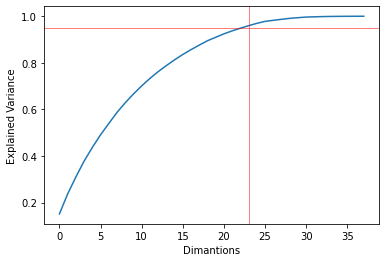

In [39]:
plt.plot(cumsum)
plt.axhline(y=0.95 , linewidth = 0.5 , color = 'r');
plt.axvline(x=d , linewidth = 0.5 , color = 'r');
plt.xlabel("Dimantions")
plt.ylabel("Explained Variance")

# PCA implementaion

In [40]:
pca = PCA(n_components = 0.95)
X_train_reduced = pd.DataFrame(pca.fit_transform(X_train))
X_val_reduced = pd.DataFrame(pca.transform(X_val))
X_test_reduced_final = pd.DataFrame(pca.transform(X_test_final))

# KNN
### KNN is a model who works by nearset neighbors.The model 'looks' at the nearest neighbors calssification which will be the best parameter to decide which type-dog or cat is the most accurate for this new given picture. We can decied how many neighbors to check by the parameter = K which represents the scope of the search. also we can do some testing to see which K will gives us the best results. 

In [41]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [44]:
knn_prediction = knn.predict(X_val)
knn.fit(X_train,y_train)
pred = knn.predict(X_val)
knn_accuracy = accuracy_score(y_val,y_pred)
print(knn_accuracy)

0.6694901179206112


# Random Forest
### Random Forest model base on decision trees. this model has the ability to know which feature contains the most significant information. it "runs" on all features and tests which feature manages to divide the data to the most accurate division percentages. Random Forest model builds many decision trees for all features, and any new picture we need to calssify, will be applied on all these trees until it makes a decision which lable it is.

In [45]:
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [46]:
from sklearn.metrics import accuracy_score
clf.fit(X_train,y_train)
pred = clf.predict(X_val)
RF_accuracy = accuracy_score(y_val,pred)
print(RF_accuracy)

0.789403753529314


# Voting
### voting model divided into hard voting and soft voting. as its name- this model makes a voting among all the models we have preformed and takes the highest score of them. the soft voting refer to the probabillity while the hard voting performs a simple vote between the models and takes the highest.

In [47]:
gnb = GaussianNB()
lr = LogisticRegression()

In [48]:
voting = VotingClassifier(estimators = [('knn',knn),("RF",clf),('gaussian-bayes',gnb)])

In [49]:
voting.fit(X_train,y_train)
pred = voting.predict(X_val)
voting_acuracy = accuracy_score(y_val,y_pred)
print(voting_acuracy)

0.6694901179206112


# Bagging and Pasting
### Bagging and pasting - bootstrap aggregating , is a an algorithm which uses the same traning algorithm for evety predictor, but to train them on different random subsets of traning set. when sampling is performed with replacement, this method is called bagging. when sampling is performed without replacment it is called pasting.

#### The Bagging classifier aoutomatically performs soft voting instead of hard voting if the base classifier cam estimate class probabilities.
##### we'll try  Bagging first, and then we'll try again with pastin and see the results

In [43]:
bag_clf = BaggingClassifier(DecisionTreeClassifier() , n_estimators = 500, max_samples = 100, bootstrap = True , n_jobs = -1)
bag_clf.fit(X_train , y_train)
y_pred = bag_clf.predict(X_val)
bagging_acuracy = accuracy_score(y_val,y_pred)
print(bagging_acuracy )

0.6694901179206112


In [50]:
bag_clf1 = BaggingClassifier(DecisionTreeClassifier() , n_estimators = 500, max_samples = 100, bootstrap = False , n_jobs = -1)
bag_clf1.fit(X_train , y_train)
y_pred = bag_clf1.predict(X_val)
pasting_acuracy = accuracy_score(y_val,y_pred)
print(pasting_acuracy )

0.6913801694070753


# XGBoost
### To explain what XGBboost is we need first to understand what GradientBoost is. GradientBoosting soupports a subsample hyperparameter, which specifies the fraction of training instances to be used for training each tree. This trades a higher bias for a lower variance. it also speeds up traning considerably. after understanding what GradientBoost means, we can explaine what XGBoost means. XGBoost -Extreame Gradient Boosting is an optimized implementation of Gradient Boosting. it aims at being extreamly fast, scalable and portable. 

In [51]:
xgb_clf = xgboost.XGBClassifier(n_estimators = 4000,learning_rate = 0.5,use_label_encoder = False, eval_metric = "merror")
xgb_clf.fit(X_train,y_train)
pred = xgb_clf.predict(X_val)
xgb_acuracy = accuracy_score(y_val,y_pred)
print(xgb_acuracy )

0.6913801694070753


# AdaBoost
### AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [52]:
ada_clf = AdaBoostClassifier( DecisionTreeClassifier(max_depth = 1),n_estimators = 200,algorithm = "SAMME.R",learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
pred = ada_clf.predict(X_val)
ada_acuracy = accuracy_score(y_val,y_pred)
print(ada_acuracy)

0.6913801694070753


# Here is a DataFrame of all accuracies by models :

In [53]:
total_models = pd.DataFrame (np.array([['xgboost' ,xgb_acuracy], ['AdaBoost',ada_acuracy], ['RF' ,RF_accuracy],['voting' ,voting_acuracy], ['pasting',pasting_acuracy], ['bagging' ,bagging_acuracy], ['KNN' ,knn_accuracy]]),
                   columns=['Model', 'Accuracy'])
total_models

,Model,Accuracy
0,xgboost,0.6913801694070753
1,AdaBoost,0.6913801694070753
2,RF,0.789403753529314
3,voting,0.6694901179206112
4,pasting,0.6913801694070753
5,bagging,0.6694901179206112
6,KNN,0.6694901179206112


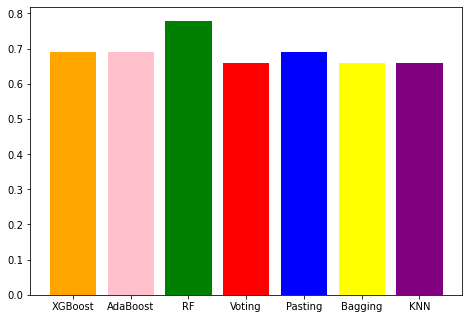

In [81]:
import matplotlib.pyplot as plt
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
langs = ['XGBoost', 'AdaBoost', 'RF', 'Voting', 'Pasting', 'Bagging', 'KNN']
accuracy = [0.69,0.69,0.78,0.66,0.69,0.66,0.66]
ax.bar(langs,accuracy)
height = [0.69,0.69,0.78,0.66,0.69,0.66,0.66]
bars = ('XGBoost', 'AdaBoost', 'RF', 'Voting', 'Pasting', 'Bagging', 'KNN')
x_pos = np.arange(len(bars))

# Create bars with different colors
plt.bar(x_pos, height, color=['orange', 'pink', 'green', 'red', 'blue', 'yellow', 'purple'])

plt.show()

## As we can see, Random Forest model has the higest accuracy. We will be using this model for our final valisation ( the one subject we save for the final test )

In [55]:
clf.fit(X_train,y_train)
pred = clf.predict(X_test_final)
RF_accuracy = accuracy_score(y_test_final,pred)
print(RF_accuracy)

0.789403753529314


# Conclusion